# Decision Tree Classification in Python 

1. Explore the Data: 
- Load the dataset, inspect basic information, and handle any missing values (if 
present). 
- Visualize the relationships between the independent variables (`age`, `job`, `marital`, `education`, `balance`, etc.) and the dependent variable (`y`). 
2. Build the Decision Tree Classification Model: 
- Use the `DecisionTreeClassifier` from scikit-learn to predict whether a client 
will subscribe to a term deposit (`y`). 
- Split the dataset into training and testing sets (80/20 split). 
- Train the Decision Tree model on the training set. 
3. Evaluate the Model: 
- Predict the subscription outcome on the testing set. 
- Calculate evaluation metrics such as accuracy, precision, recall, and F1-score. 
- Present the confusion matrix for better insight into model performance. 
4. Improve the Model (if necessary): 
- Try different feature selections or combinations of independent variables. 
5. Visualize the Tree: 
- Plot the decision tree structure using `plot_tree` or `export_graphviz` from 
scikit-learn. 
- Provide a clear interpretation of the most important decision points in the tree. 
6. Deploy the Model: 
- Create a function that takes as input key parameters such as age, job, education, balance, and outputs the predicted result (whether the client will subscribe to a term deposit or not).

## 1. Explore the Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### - Load the dataset, inspect basic information, and handle any missing values (if present). 

In [2]:
# Tải dữ liệu vào dataframe
df = pd.read_csv("D:/Machine Learning/Dataset/DT_BankMarketing.csv")

In [3]:
# Hiển thị dữ liệu
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Hiển thị thông tin từng cột dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Có 17 cột, 45211 dòng, trong đó: có 7 cột kiểu số và 10 cột kiểu khác (là biến phân loại)

In [5]:
# Hiển thị các cột có giá trị null
null_columns = df.columns[df.isnull().any()]
null_columns

Index([], dtype='object')

Không có giá trị null

In [6]:
# Kiểm tra các dòng bị trùng lặp
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

Không có giá trị trung lặp

### - Visualize the relationships between the independent variables (`age`, `job`, `marital`, `education`, `balance`, etc.) and the dependent variable (`y`). 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Chuyển đổi dữ liệu biến phân loại sang dạng số

Dữ liệu trước khi chuyển đổi

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
# Chuyển đổi job từ ký tự thành dạng số 
label_encoder_job = LabelEncoder()
df['job'] = label_encoder_job.fit_transform(df['job'])

In [11]:
# Hiển thị mối tương quan giữa các giá trị ban đầu và giá trị đã mã hóa
mapping = dict(zip(label_encoder_job.classes_, label_encoder_job.transform(label_encoder_job.classes_)))
print(mapping)

{'admin.': np.int64(0), 'blue-collar': np.int64(1), 'entrepreneur': np.int64(2), 'housemaid': np.int64(3), 'management': np.int64(4), 'retired': np.int64(5), 'self-employed': np.int64(6), 'services': np.int64(7), 'student': np.int64(8), 'technician': np.int64(9), 'unemployed': np.int64(10), 'unknown': np.int64(11)}


Các biến phân loại được mã hoá thành số theo thứ tự sau:
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired' 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown'] 
tương ứng giá trị từ 0 đến 11

In [12]:
#Chuyển đổi cột marital từ ký tự thành dạng số
label_encoder_marital = LabelEncoder()
df['marital'] = label_encoder_marital.fit_transform(df['marital'])

In [13]:
# Hiển thị mối tương quan giữa các giá trị ban đầu và giá trị đã mã hóa
mapping = dict(zip(label_encoder_marital.classes_, label_encoder_marital.transform(label_encoder_marital.classes_)))
print(mapping)

{'divorced': np.int64(0), 'married': np.int64(1), 'single': np.int64(2)}


Các biến phân loại được mã hoá thành số theo thứ tự sau:
['divorced' 'maried' 'single'] tương ứng với giá trị 0,1,2

In [14]:
#Chuyển đổi cột education từ ký tự thành dạng số
label_encoder_education = LabelEncoder()
df['education'] = label_encoder_education.fit_transform(df['education'])

In [15]:
# Hiển thị mối tương quan giữa các giá trị ban đầu và giá trị đã mã hóa
mapping = dict(zip(label_encoder_education.classes_, label_encoder_education.transform(label_encoder_education.classes_)))
print(mapping)

{'primary': np.int64(0), 'secondary': np.int64(1), 'tertiary': np.int64(2), 'unknown': np.int64(3)}


Các biến phân loại được mã hoá thành số theo thứ tự như sau:
['primary' 'secondary' 'tertiary' 'unknown'] thành 0,1,2,3

In [16]:
#Chuyển đổi cột default từ ký tự thành dạng số
label_encoder_default = LabelEncoder()
df['default'] = label_encoder_default.fit_transform(df['default'])

In [17]:
# Hiển thị mối tương quan giữa các giá trị ban đầu và giá trị đã mã hóa 
mapping = dict(zip(label_encoder_default.classes_, label_encoder_default.transform(label_encoder_default.classes_)))
print(mapping)

{'no': np.int64(0), 'yes': np.int64(1)}


Các biến phân loại được má hoá thành số như sau: ['no' 'yes'] thành 0,1

In [18]:
#Chuyển đổi cột housing từ ký tự thành dạng số như sau: ['no' 'yes'] thành 0,1
label_encoder_housing = LabelEncoder()
df['housing'] = label_encoder_housing.fit_transform(df['housing'])

In [19]:
# Hiển thị mối tương quan giữa các giá trị ban đầu và giá trị đã mã hóa
mapping = dict(zip(label_encoder_housing.classes_, label_encoder_housing.transform(label_encoder_housing.classes_)))
print(mapping)

{'no': np.int64(0), 'yes': np.int64(1)}


Các biến phân loại được má hoá thành số như sau: ['no' 'yes'] thành 0,1

In [20]:
#Chuyển đổi cột loan từ ký tự thành dạng số như sau: ['no' 'yes'] thành 0,1
label_encoder_loan = LabelEncoder()
df['loan'] = label_encoder_loan.fit_transform(df['loan'])

In [21]:
# Hiển thị mối tương quan giữa các giá trị ban đầu và giá trị đã mã hóa
mapping = dict(zip(label_encoder_loan.classes_, label_encoder_loan.transform(label_encoder_loan.classes_)))
print(mapping)

{'no': np.int64(0), 'yes': np.int64(1)}


Các biến phân loại được má hoá thành số như sau: ['no' 'yes'] thành 0,1

In [22]:
#Chuyển đổi cột contact từ ký tự thành dạng số
label_encoder_contact = LabelEncoder()
df['contact'] = label_encoder_contact.fit_transform(df['contact'])

In [23]:
# Hiển thị mối tương quan giữa các giá trị ban đầu và giá trị đã mã hóa
mapping = dict(zip(label_encoder_contact.classes_, label_encoder_contact.transform(label_encoder_contact.classes_)))
print(mapping)

{'cellular': np.int64(0), 'telephone': np.int64(1), 'unknown': np.int64(2)}


Các biến phân loại được má hoá thành số như sau: ['cellular' 'telephone' 'unknown'] thành 0,1,2

In [24]:
#Chuyển đổi cột month từ ký tự thành tháng có dạng số
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month

Tháng được mã hoá thành số tương ứng với các giá trị ban đầu

In [25]:
#Chuyển đổi cột poutcome từ ký tự thành dạng số như sau: ['failure' 'other' 'success' 'unknown'] thành 0,1,2,3
label_encoder_poutcome = LabelEncoder()
df['poutcome'] = label_encoder_poutcome.fit_transform(df['poutcome'])

In [26]:
# Hiển thị mối tương quan giữa các giá trị ban đầu và giá trị đã mã hóa
mapping = dict(zip(label_encoder_poutcome.classes_, label_encoder_poutcome.transform(label_encoder_poutcome.classes_)))
print(mapping)

{'failure': np.int64(0), 'other': np.int64(1), 'success': np.int64(2), 'unknown': np.int64(3)}


Các biến phân loại được mã hoá thành số như sau: ['failure' 'other' 'success' 'unknown'] thành 0,1,2,3

In [27]:
#Chuyển đổi cột y từ ký tự thành dạng số như sau: ['no' 'yes'] thành 0,1
label_encoder_y = LabelEncoder()
df['y'] = label_encoder_y.fit_transform(df['y'])

In [28]:
# Hiển thị mối tương quan giữa các giá trị ban đầu và giá trị đã mã hóa
mapping = dict(zip(label_encoder_y.classes_, label_encoder_y.transform(label_encoder_y.classes_)))
print(mapping)

{'no': np.int64(0), 'yes': np.int64(1)}


Các biến phân loại được má hoá thành số như sau: ['no' 'yes'] thành 0,1

In [29]:
# Xem lại dữ liệu sau khi đã thực hiện mã hoá
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int32(1), int64(16)
memory usage: 5.7 MB


#### Hiển thị mối quan hệ tương quan giữa biến độc lập và biến phụ thuộc (y)

##### Vẽ biểu đồ heatmap để biểu thị mối tương quan giữa các biến độc lập với biến phụ thuộc

In [31]:
# Tính Correlation
df_corr=df.corr()
df_corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,0.043142,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.050938,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,0.054729,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,-0.173779,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


Ta được ma trận mới thể hiện sự tương quan giữa các biến độc lập

<Axes: >

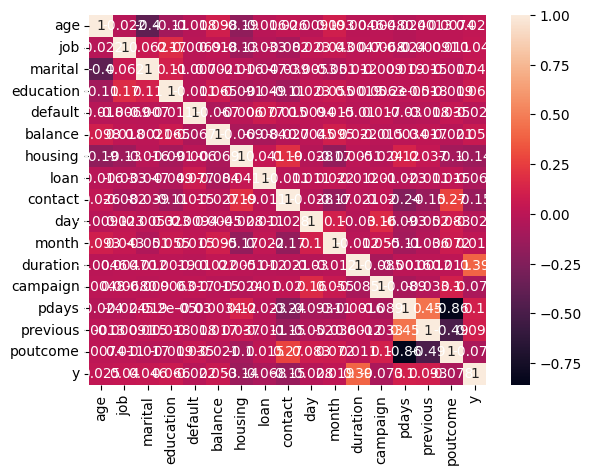

In [32]:
# Vẽ biểu đồ nhiệt với nguồn DL từ df_corr
sns.heatmap(df_corr, annot=True)


##### Biểu đồ hơi khó nhìn nên ta sẽ tạo 1 mảng mới có cùng dạng và kiểu dữ liệu với df_corr và chỉ định nó là kiểu boolean


In [33]:
# Tạo mảng mới 
# Các giá trị mảng mới là giá trị boolean
one_corr = np.ones_like(df_corr, dtype=bool)
one_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True

In [34]:
#Tạo ma trận mask loại bỏ các giá trị lặp do ở ma trận tương quan trên các giá trị trên và dưới đường chéo chính đối xứng nhau
#Tạo ma trận tam giác trên
mask = np.triu(one_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False

<Axes: >

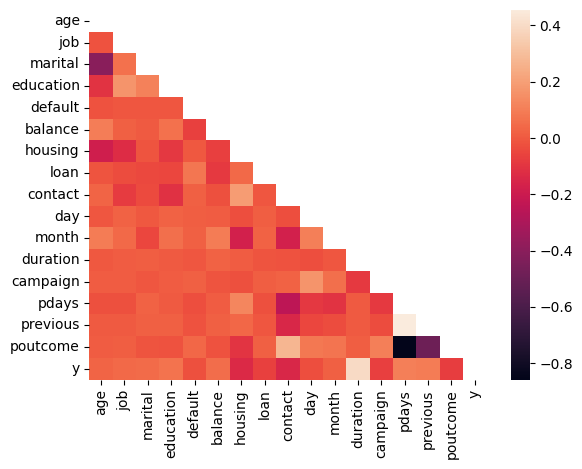

In [35]:
# Vẽ biểu đồ nhiệt với nguồn dữ liệu là ma trận tương quan df_corr và sử dụng ma trận mark để vẽ
sns.heatmap(data=df_corr, mask=mask)

Sử dụng ma trận mask để vẽ biểu độ dưới dạng ma trận tam giác đồng thời loại bỏ các giá trị trung lặp do sự đối xứng giữa các giá trị qua đường chéo chính giúp biểu đồ có cái nhìn trực quan hơn

##### Vẽ lại heatmap với các giá trị tự tương quan đã bị loại bỏ

In [36]:
# Tạo ma trận mới từ ma trận mask nhưng loại bỏ hàng đầu tiên và cột cuối cùng
adjusted_mask = mask[1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  Tru

In [37]:
# Tạo 1 dataframe mới từ df_corr bằng cách loại bỏ hàng đầu tiên và cột cuối cùng
adjusted_df_corr = df_corr.iloc[1: , :-1]
adjusted_df_corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,0.043142,0.004744,0.006839,-0.024455,-0.000911,0.011010
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.050938,0.011852,-0.008994,0.019172,0.014973,-0.016850
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,0.054729,0.001935,0.006255,0.000052,0.017570,-0.019361
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,0.034898
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,-0.020967
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,-0.099971
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,0.015458
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,-0.173779,-0.020839,0.019614,-0.244816,-0.147811,0.272214
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,0.083460
month,0.092903,0.043142,-0.050938,0.054729,0.014989,0.094605,-0.173887,0.021638,-0.173779,0.101989,1.000000,-0.011866,0.054868,-0.108940,-0.035600,0.071666


<Axes: >

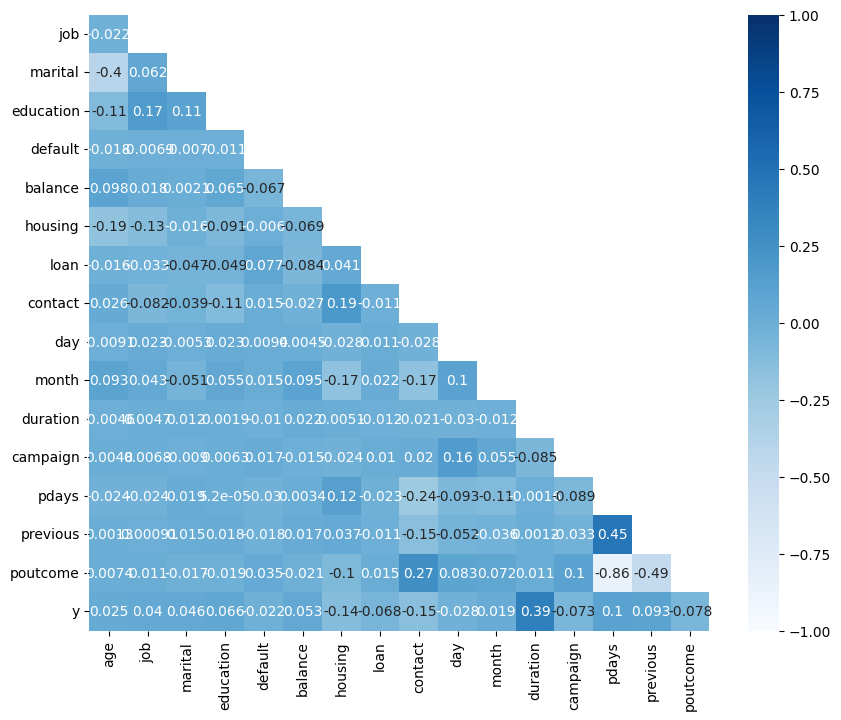

In [38]:
# Tạo 1 khung vẽ và 1 trục toạ độ với kích thước là 10 inch ngang, 8 inch dọc
fig, ax = plt.subplots(figsize=(10,8))
# Vẽ biểu đồ nhiệt với adjusted_df_corr làm nguồn dữ liệu, ma trận mask để bỏ các giá trị tự tương quan
# Hiển thị giá trị trong ô, màu sắc là màu xanh, giới hạn giá trị từ -1 đến 1
sns.heatmap(data=adjusted_df_corr, mask=adjusted_mask,
            annot=True, cmap='Blues',
            vmin=-1, vmax=1)

So với biểu đồ trên thì biểu đồ này rõ ràng hơn chút khi ta đã loại bỏ các giá trị tự tương quan của các biến

## 2. Build the Decision Tree Classification Model: 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier  



### - Split the dataset into training and testing sets (80/20 split). 

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0


In [41]:
# Chia dữ liệu
feature = ['y']
# axis = 1 là thao tác trên cột, axis = 0 là thao tác trên hàng
X = df.drop(feature, axis=1)  # Biến độc lập

y = df['y']               # Biến phụ thuộc
# Chia tập dữ liệu train, test với tập test là 0.2  bộ dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# kiểm tra số dòng từng bộ DL. .shape[x,y]: là thuộc tính ma trận với x là dòng y là cột
print(f'Training set size: {X_train.shape[0]} samples')

print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 36168 samples
Test set size: 9043 samples


Dữ liệu train có 36168 quan sát
Dữ liệu test có 9043 quan sát

### - Train the Decision Tree model on the training set. 

In [42]:
# Khởi tạo mô hình cho bài toán phân loại
my_tree = DecisionTreeClassifier()
# Huấn luyện mô hình
my_tree.fit(X_train, y_train)

DecisionTreeClassifier()

## 3. Evaluate the Model:

### - Predict the subscription outcome on the testing set. 

In [43]:
# Dự đoán
y_pred = my_tree.predict(X_test)
# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8761472962512441


Mô hình sau khi train có độ chính xác là 87%

### - Calculate evaluation metrics such as accuracy, precision, recall, and F1-score. 

In [44]:
from sklearn.metrics import classification_report
# Tính accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Tính precision
precision = precision_score(y_test, y_pred, average='weighted')
print("precision", precision)

# Tính Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Tính F1
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

print(classification_report(y_test,y_pred))

Accuracy: 0.8761472962512441
precision 0.8757558027525038
Recall: 0.8761472962512441
F1-score: 0.8759505508067617
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.49      0.48      0.48      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



- Accuracy = 87,46%: Tỷ lệ dự đoán chính xác của mô hình là 87% tổng số mẫu dữ liệu. Mô hình có độ chính xác khá cao
- Precision = 87,51%: Tỷ lệ các mẫu được dự đoán là True Positive là 87,51%. Tỷ lệ khá cao do đó mô hình ít khi nhầm lẫn khi dự đoán khách hàng không đăng kí gửi tiết kiệm thành có
- Recall = 87,46%: Tỷ lệ các mẫu TP thực tế được mô hình dự đoán đúng là 87,46%. Tỷ lệ khá cao điều đó cho thấy mô hình có thể dự đoán đúng hầu hết các khách hàng có kí gửi tiết kiệm
- F1 = 87,48%: cho thấy mô hình có tỷ lệ precision và recall khá cao, nghĩa là mô hình vừa chính xác vừa toàn diện

### - Present the confusion matrix for better insight into model performance. 

In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7396  556]
 [ 564  527]]


- [7377]: Số lượng khách hàng không đăng ký gửi tiết kiệm và mô hình dự đoán đúng là không đăng ký (True Negative - TN).
- [575]: Số lượng khách hàng không đăng ký gửi tiết kiệm nhưng mô hình lại dự đoán là sẽ đăng ký (False Positive - FP).
- [549]: Số lượng khách hàng đăng ký gửi tiết kiệm nhưng mô hình lại dự đoán là không đăng ký (False Negative - FN).
- [542]: Số lượng khách hàng đăng ký gửi tiết kiệm và mô hình dự đoán đúng là đăng ký (True Positive - TP).

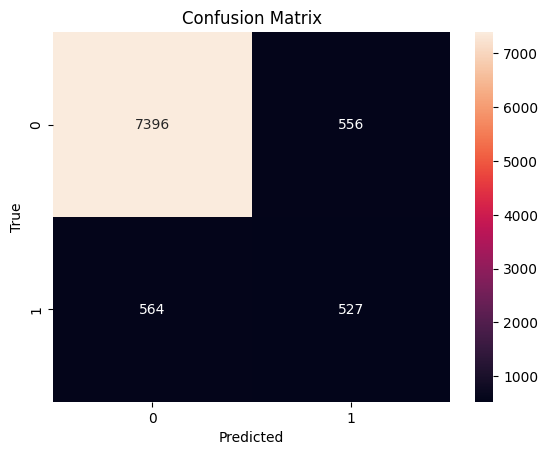

In [46]:
# Định nghĩa hàm vẽ ma trận nhầm lẫn
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Vẽ ma trận nhầm lẫn
plot_confusion_matrix(my_tree, X_test, y_test)

C:\Users\acer\AppData\Local\Temp\ipykernel_26352\1266133226.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette=colors)
C:\Users\acer\AppData\Local\Temp\ipykernel_26352\1266133226.py:12: UserWarning: 
The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=feature_imp, y=feature_imp.index, palette=colors)


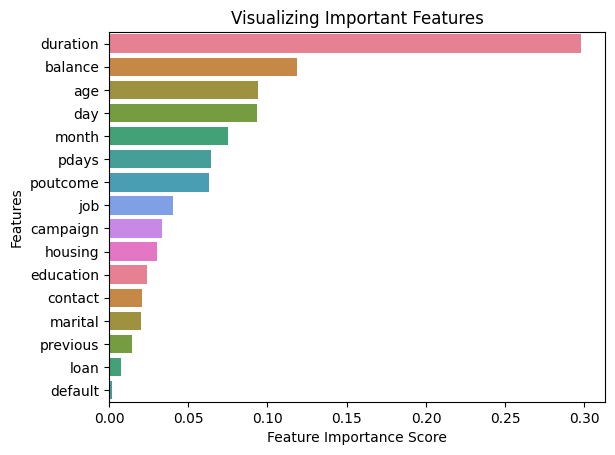

In [47]:
# Đánh giá mức độ ảnh hưởng của các biến độc lập với biến phụ thuộc
import pandas as pd
feature_imp = pd.Series(my_tree.feature_importances_, #trả về mảng chứa chỉ số đánh giá độ quan trọng 
                       index=df.columns.values[0:16]).sort_values(ascending=False) #gán tên cột của tập dữ liệu làm chỉ số cho series
import matplotlib.pyplot as plt
import seaborn as sns
# Chọn bảng màu có 10 màu
palette = sns.color_palette("husl", 10)
# Lấy 16 màu đầu tiên (lặp lại nếu cần)
colors = palette[:16]
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, palette=colors)
# Add labels to your graph
plt.xlabel('Feature Importance Score')      #Thêm nhãn cho trục x
plt.ylabel('Features')                      #Thêm nhãn cho trục y
plt.title("Visualizing Important Features") #Thêm tiêu đề cho biểu đồ
plt.show()

## 4. Improve the Model (if necessary): 
- Try different feature selections or combinations of independent variables. 

In [48]:
# Cắt tỉa lại cây với các yêu cầu sau: 
# Tiêu chí để đo độ phân chia là entropy, mô hình sẽ lựa chọn thuộc tính có độ hỗn loạn thấp nhất làm root
# độ sâu tối đa là 10
# xem xét tất cả thuộc tính
# mỗi lá chứa ít nhất 4 mẫu
# mỗi nút phải có ít nhất 10 mẫu
dt_params = {'criterion': 'entropy',
              'max_depth': 10,
              'max_features': None,
              'min_samples_leaf': 4,
              'min_samples_split': 10}
# Khởi tạo lại cây với các tiêu chí mới
dt = DecisionTreeClassifier(**dt_params, random_state=0)

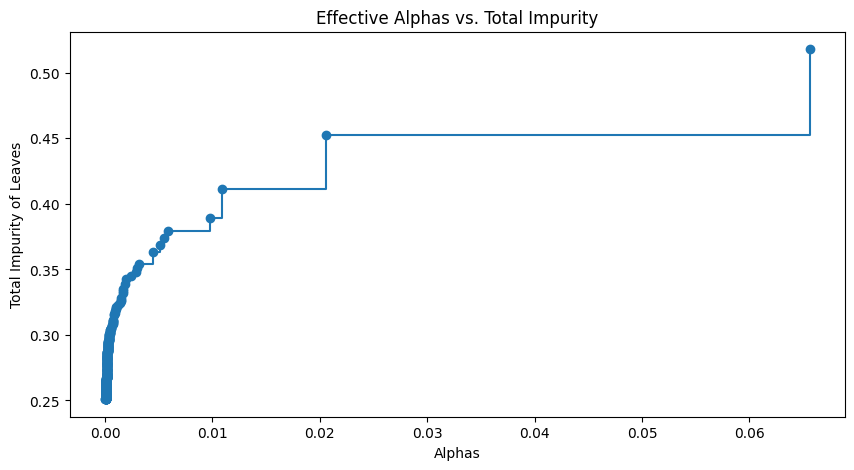

Train Accuracy: 0.9078743640787437
Test Accuracy: 0.8971580227800509


In [49]:
# Tính toán đường dẫn cắt tỉa
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Biểu diễn mối quan hệ giữa alphas với độ bất thuần của cây
plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
plt.xlabel('Alphas')
plt.ylabel('Total Impurity of Leaves')
plt.title('Effective Alphas vs. Total Impurity')
plt.show()

# Chọn giá trị alpha tối ưu nhất
optimal_alphas = ccp_alphas[np.argmax(impurities > impurities.mean())]

# cắt tỉa cây theo giá trị alpha đã chọn
pruned_tree = DecisionTreeClassifier(ccp_alpha=optimal_alphas, random_state=42)
# Huấn luyện cây mới
pruned_tree.fit(X_train, y_train)

# Đánh giá lại độ chính xác của mô hình
print("Train Accuracy:", pruned_tree.score(X_train, y_train))
print("Test Accuracy:", pruned_tree.score(X_test, y_test))

## 5. Visualize the Tree: 
- Plot the decision tree structure using `plot_tree` or `export_graphviz` from 
scikit-learn. 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int32(1), int64(16)
memory usage: 5.7 MB


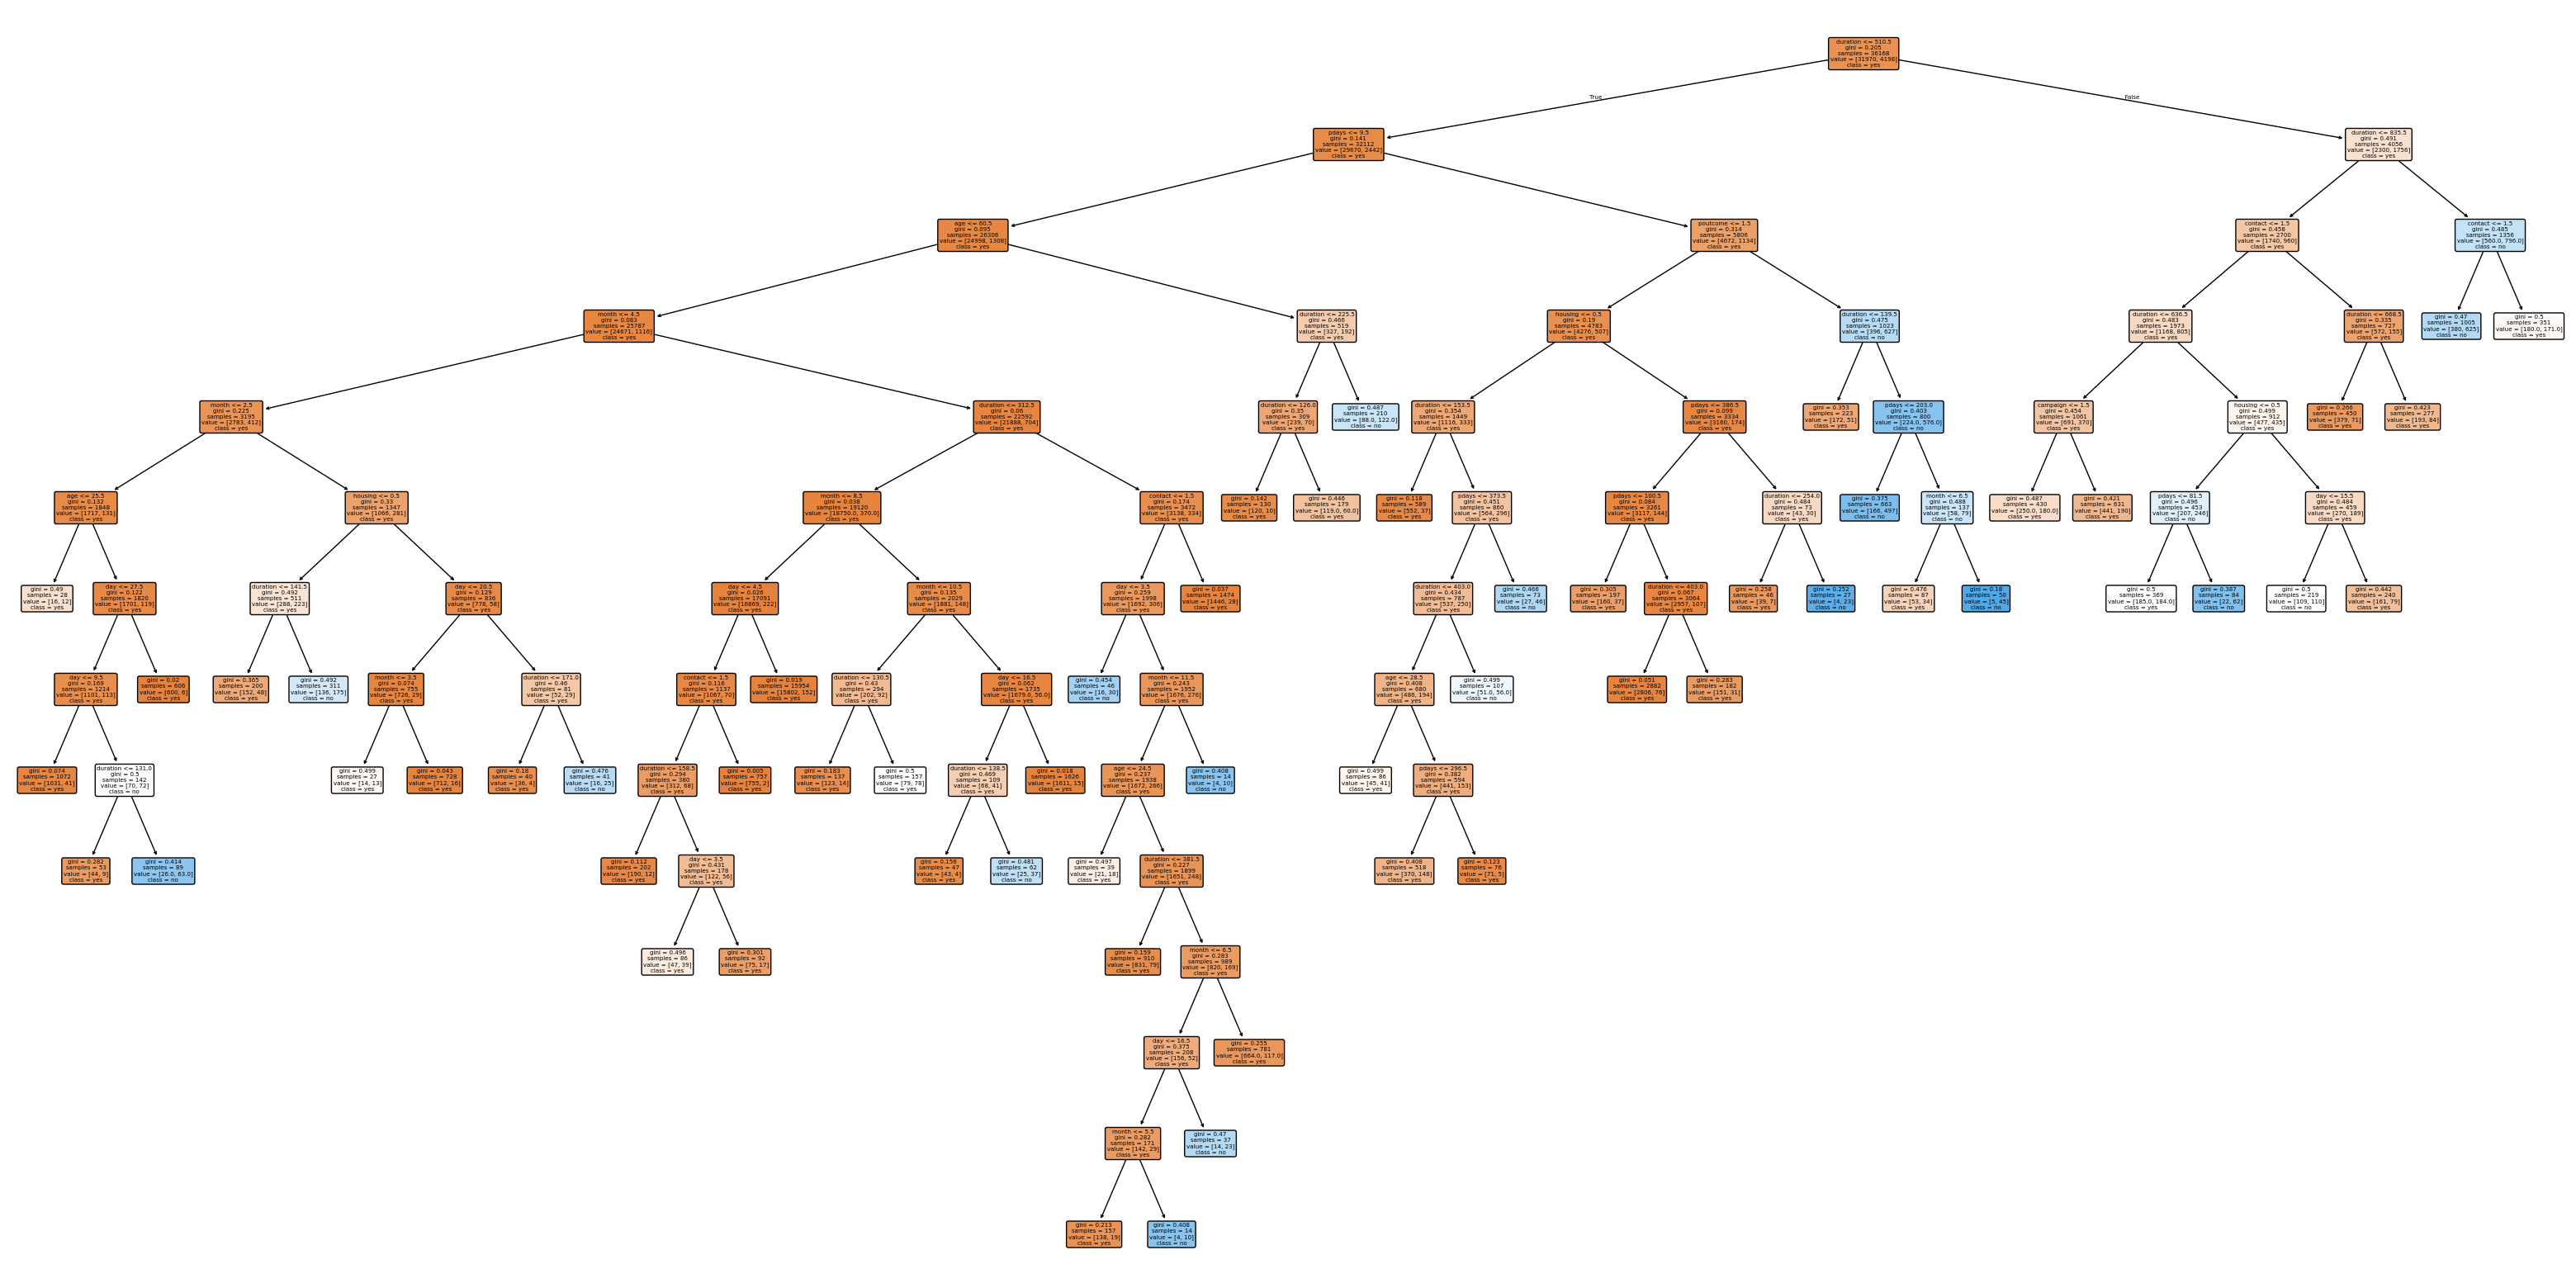

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
plot_tree(pruned_tree, filled=True, rounded=True, feature_names=X_train.columns, class_names=['yes', 'no'])  # Replace class names with your actual classes
plt.show()

### Provide a clear interpretation of the most important decision points in the tree. 
Nút root: thuộc tính duration. Nếu duration dưới 510.5s thì khả năng khách hàng sẽ đăng ký tiết kiệm có kỳ hạn. Còn trên 510.5s thì là không đăng ký
- Nút nội bộ:
    + pdays dưới 9.5 thì khách hàng sẽ đăng kí gửi kì hạn, trên 9.5 thì sẽ không đăng ký
    + duration dưới 835.5 thì khách hàng sẽ kí gửi kì han, còn trên thì sẽ không đăng ký
    

## 6. Deploy the Model: 
- Create a function that takes as input key parameters such as age, job, education, balance, and outputs the predicted result (whether the client will 
subscribe to a term deposit or not). 

In [52]:
new_test=pd.DataFrame({'age' : [20,30,40],
                       'job': [0,7,5],
                       'marital' : [1,2,0],
                       'education': [1,2,0],
                       'default' : [0,1,1],
                       'balance' : [200,2000,4000],
                       'housing' : [1,0,0],
                       'loan' : [0,1,0],
                       'contact' : [2,1,0],
                       'day' : [15,20,10],
                       'month' : [1,12,6],
                       'duration' : [55,900,500],
                       'campaign' : [5,50,25],
                       'pdays' : [5,60,500],
                       'previous' : [25,200,50],
                       'poutcome' : [3,1,2]})

In [53]:
y_new_pred=pruned_tree.predict(new_test)
y_new_pred

array([0, 1, 0])

Dữ liêu kết quả trả về 0,1,0 nghĩa là khách hàng 1 và 3 không ký gửi tiết kiệm có kỳ hạn. Còn khách hàng 2 có đăng ký gửi kỳ han